In [12]:
from skimage.transform import resize      #- skimage is a library for image processing.#- transform is a module within skimage for image transformations. #- resize is a function within transform for resizing images.
from skimage.io import imread 
from skimage import io
import numpy as np
                                           
        

In [13]:
# Load the image and convert it to a data frame.

datadir="D://PROJECTS//CV_PROJECTS//images//SVM"
categories=['dog','dhoni']
flat_data_arr=[]
target_arr=[]
import os
#path=os.path.join(datadir)
#print(path)
for i in categories:
    print(f'loading--category:{i}')
    path=os.path.join(datadir,i)
    #print(path)
    for img in os.listdir(path):
        #print(img)
        img_array=imread(os.path.join(path,img))
        #print(img_array)
        #io.imshow(img_array)
        #io.show()    its show all the images
        img_resized=resize(img_array,(150,150,3))  # Resizes the image to 150x150 pixels with 3 color channels using skimage.transform.resize.

        #io.imshow(img_resized)
        #io.show() 
        flat_data_arr.append(img_resized.flatten()) # Flattening is the process of converting a multi-dimensional array into a one-dimensional array
        '''import numpy as np

            arr = np.array([[1, 2, 3], [4, 5, 6]])
            flattened_arr = arr.flatten()
            print(flattened_arr)  # Output: [1, 2, 3, 4, 5, 6]
                                                                    '''
        #print(flat_data_arr)
        target_arr.append(categories.index(i))   # Appends the index of the current category (0 for 'cats', 1 for 'dogs') to target_arr.

        #print(target_arr)
    print(f'loaded category:{i} successfully')
      
flat_data=np.array(flat_data_arr) 
target=np.array(target_arr)
#print(target)
#io.imshow(flat_data)
#io.show()  

loading--category:dog
loaded category:dog successfully
loading--category:dhoni
loaded category:dhoni successfully


In [14]:
#dataframe

import pandas as pd

df=pd.DataFrame(flat_data)
                    #    z=df
                       # print(z)
#print(df)
df['Target']=target
#print('\n\n\n\n')
#print(df)
df.shape


(47, 67501)

In [15]:
# Separate input features and targets.


x=df.iloc[:,:-1]  # iloc[rows,columns]
x
#y=df['Target']# we also give like this
y=df.iloc[:,-1]

In [16]:
# splitting the dataset 

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(37, 67500)
(10, 67500)
(37,)
(10,)


In [17]:
# building the model
# before model building we can specify the hyperperameters
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100],
            'gamma':[0.0001,0.001,0.1,1],
                'kernel':['rbf','poly']}

from sklearn.svm import SVC
svm=SVC(probability=True)
model=GridSearchCV(svm,param_grid)

'''The parameter grid specifies the hyperparameters that we want to tune, 
including C, gamma, and kernel. C is the penalty parameter of the error term, 
gamma is the kernel coefficient, and the kernel is the kernel type. 
We provide a range of values for each hyperparameter, and GridSearchCV will perform an 
exhaustive search over all possible combinations of hyperparameters to find the optimal values.'''

'The parameter grid specifies the hyperparameters that we want to tune, \nincluding C, gamma, and kernel. C is the penalty parameter of the error term, \ngamma is the kernel coefficient, and the kernel is the kernel type. \nWe provide a range of values for each hyperparameter, and GridSearchCV will perform an \nexhaustive search over all possible combinations of hyperparameters to find the optimal values.'

In [ ]:
## Training the model using the training data 

model.fit(x_train,y_train)

In [ ]:
# Testing the model using the testing data 
y_pred = model.predict(x_test) 



from sklearn.metrics import accuracy_score

# Calculating the accuracy of the model 
accuracy = accuracy_score(y_pred, y_test) 

# Print the accuracy of the model 
print(f"The model is {accuracy*100}% accurate")


In [ ]:
#  Classification Report 
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['cat', 'dog']))


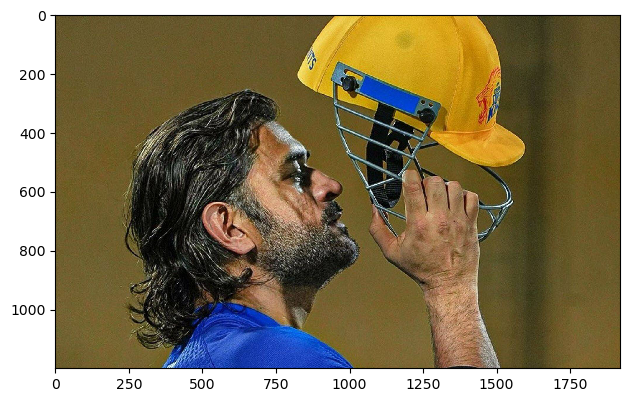

NameError: name 'Categories' is not defined

In [11]:
#: Prediction
#from matplotlib.pyplot as plt
path='D:\PROJECTS\CV_PROJECTS\images\ALL IMAGES DATASET\dhoni//dhoni_8.jpeg'
img=io.imread(path) 
io.imshow(img) 
io.show() 
img_resize=resize(img,(150,150,3)) 
l=[img_resize.flatten()] 
probability=model.predict_proba(l) 
for ind,val in enumerate(Categories): 
    print(f'{val} = {probability[0][ind]*100}%') 
print("The predicted image is : "+Categories[model.predict(l)[0]])


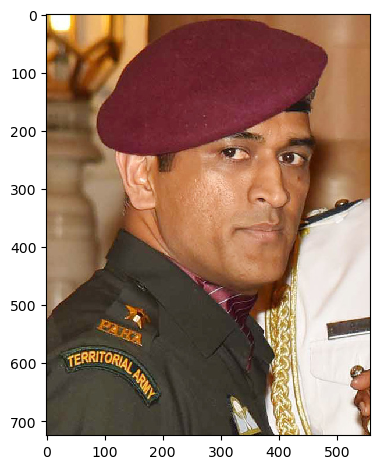

In [54]:
img=io.imread('D://PROJECTS//CV_PROJECTS//images//ALL IMAGES DATASET//dhoni//dhoni_10.jpeg')

io.imshow(img)
io.show()